In [1]:
import json 
import numpy as np 
import torch
from tqdm import tqdm 
import networkx as nx
import pandas as pd 

from fugw_solver.solver import solver
import ot

from collections import defaultdict

import multiprocessing

In [8]:
with open("dataset/mutag.json", 'r') as f:
    data = json.load(f)


features = data["node_feat"]
edge_index = data["edge_index"]
y = data["y"]
num_nodes = data["num_nodes"]

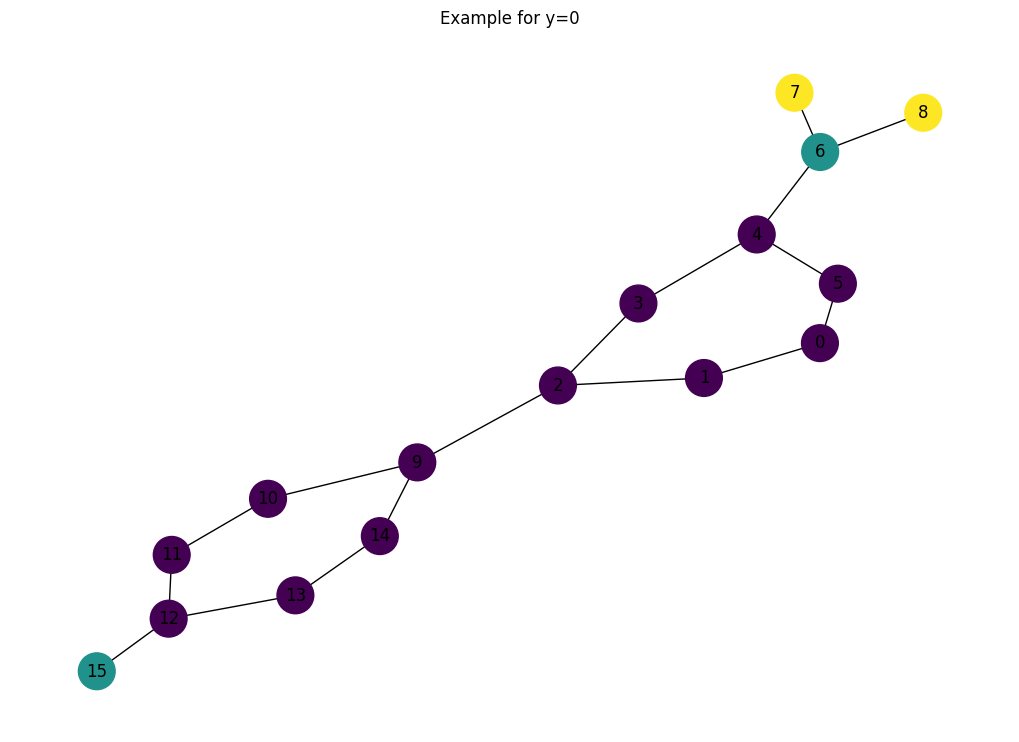

In [52]:
# Create an empty graph
G = nx.Graph()

ind = 65

# Add nodes
for node in range(num_nodes[ind]):
    G.add_node(node)

# Add edges
edges = np.array(edge_index[ind]).T
for source, target in edges:
    G.add_edge(source, target)

node_colors = [sum(i*f for i, f in enumerate(feature)) for feature in features[ind]]

# Drawing the graph
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color=node_colors, node_size=700, edge_color='k')
plt.title(f"Example for y={y[ind][0]}")
plt.show()